In [2]:
import numpy as np
from zipfile import ZipFile
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
stopwords_set = stopwords.words("English")

In [3]:
corpus = pd.read_csv("D:/block5/LinkedIn_Posting_Markup/data/linkedin_data.csv")
len(corpus)

2246

In [4]:
corpus.head()

,Unnamed: 0,url,title,job_description,seniority_level,employment_type
0,0,https://www.linkedin.com/jobs/view/database-de...,Database Developer,['SummaryThe Database Developer is part of the...,Entry level,Full-time
1,1,https://www.linkedin.com/jobs/view/software-en...,Software Engineer I (Full Time) United States,['What You’ll DoOur software engineers are the...,Not Applicable,Full-time
2,2,https://www.linkedin.com/jobs/view/penetration...,Penetration Tester (Network/Cloud/Application)...,['Responsibilities About TikTokTikTok is the l...,Not Applicable,Full-time
3,3,https://www.linkedin.com/jobs/view/sql-develop...,SQL Developer,"['SQL Developer - Long Beach, CA - Infosys Ne...",Entry level,Contract
4,4,https://ca.linkedin.com/jobs/view/cyber-securi...,Cyber Security Specialist,['As one of Canada’s largest and fastest growi...,Not Applicable,Full-time


In [5]:
words = [word.lower() for text in corpus['job_description'] for word in word_tokenize(text.split('[')[1][:-3]) if word.isalpha()]
len(words)

956313

In [6]:
types = set(words)
len(types)

28740

In [7]:
counts = Counter(words)
counts.most_common(25)

[('and', 56519),
 ('to', 32166),
 ('the', 25910),
 ('of', 22814),
 ('a', 18864),
 ('in', 17704),
 ('with', 15764),
 ('for', 12099),
 ('is', 8798),
 ('or', 8336),
 ('you', 7674),
 ('our', 7662),
 ('data', 7160),
 ('experience', 6584),
 ('on', 6372),
 ('are', 6220),
 ('as', 6102),
 ('will', 5571),
 ('we', 5460),
 ('that', 5441),
 ('be', 5346),
 ('work', 5014),
 ('team', 4987),
 ('an', 4886),
 ('your', 3378)]

In [8]:
counts = Counter([word for word in words if word not in stopwords_set])
counts.most_common(25)

[('data', 7160),
 ('experience', 6584),
 ('work', 5014),
 ('team', 4987),
 ('software', 3323),
 ('security', 3276),
 ('development', 3125),
 ('skills', 2825),
 ('working', 2690),
 ('learning', 2558),
 ('business', 2543),
 ('new', 2284),
 ('including', 2244),
 ('role', 2169),
 ('engineering', 2163),
 ('years', 2061),
 ('company', 2057),
 ('knowledge', 1981),
 ('design', 1967),
 ('science', 1943),
 ('systems', 1876),
 ('technical', 1841),
 ('opportunity', 1824),
 ('support', 1796),
 ('cloud', 1781)]

In [9]:
corpora = ["treebank", "gutenberg", "reuters", "switchboard","webtext", "movie_reviews"]
exec("from nltk.corpus import " + ", ".join(corpora))

def ordered_bar_from_dict(py_dict, title):
    '''create a bar chart from values in py_dict, ordered from smallest to largest and labeled with keys'''
    labels = sorted(py_dict.keys(),key=lambda x: py_dict[x])
    y_pos = np.arange(len(labels))
    values = sorted(py_dict.values())

    plt.bar(y_pos, values, align='center', alpha=0.5,color=list('rgbkym'))
    plt.xticks(y_pos, labels,rotation=45)
    plt.title(title)
    plt.show()

def type_token_ratio(words, num_words):
    '''calculate type-token ratio from the corpus of word tokens (list of strings) using the first
    num_words tokens'''
    type_set = set(word.lower() for word in words[:num_words])
    return len(type_set) / num_words    

def average_word_length(words):
    '''calculate the average length of the provided words'''
    total_words = 0
    total_chars = 0
    for word in words:
        total_words += 1
        total_chars += len(word)
    return total_chars/total_words

def get_unigram_probs(words):
    '''get unigram probabilities for the words in a corpus'''
    counts = Counter(word.lower() for word in words)
    total = sum(counts.values())
    return {word:count/total for word,count in counts.items()}
    
def divide_probs(prob1, prob2):
    '''given two probability dictionaries, create a dictionary has the ratios of probabilities (prob1/prob2)
    for each word included in both'''
    all_words = set(prob1.keys()).intersection(prob2.keys())
    return {word:prob1.get(word,0)/prob2.get(word,0) for word in all_words}

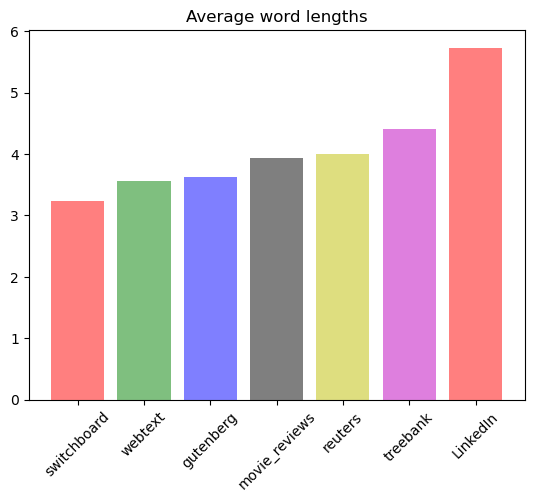

In [11]:
avg_word_lengths = {}
avg_word_lengths["LinkedIn"] = average_word_length(words)
for corpus in corpora:
    exec("words = " +corpus + ".words()")
    avg_word_lengths[corpus] = average_word_length(words)
ordered_bar_from_dict(avg_word_lengths,"Average word lengths")

In [12]:
avg_word_lengths["LinkedIn"]

5.731176926382889

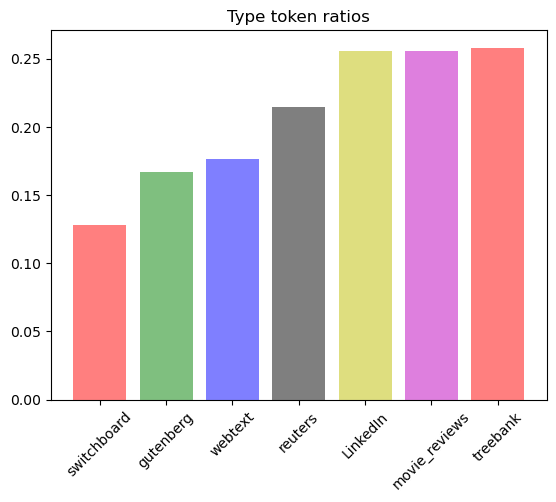

In [14]:
ttrs = {}
ttrs["LinkedIn"] = type_token_ratio(words, 10000)
for corpus in corpora:
    exec("words = " +corpus + ".words()")
    ttrs[corpus] = type_token_ratio(words,10000)
ordered_bar_from_dict(ttrs,"Type token ratios")

In [15]:
ttrs["LinkedIn"]

0.2554

In [16]:
webtext_probs = get_unigram_probs(webtext.words())
LinkedIn_probs = get_unigram_probs(words)

div_dict = divide_probs(webtext_probs, LinkedIn_probs)
div_sorted_words = sorted(div_dict.keys(), key=lambda x: div_dict[x])

print(div_sorted_words[:50])

['film', 'series', 'moments', 'scenes', 'comic', 'actors', 'kevin', 'director', 'roles', 'jackie', 'actor', 'lee', 'scream', 'oscar', 'fans', 'eventually', 'released', 'sequel', 'hilarious', 'ben', 'effective', 'alien', 'decides', 'jim', 'starring', 'sam', 'likely', 'scott', 'effects', 'merely', 'carter', 'played', 'horror', 'allen', 'fi', 'cinematography', 'brief', 'atmosphere', 'subtle', 'supporting', 'humor', 'amusing', 'grace', 'meanwhile', 'audience', 'sean', 'casting', 'trailer', 'detective', 'delivers']


In [17]:
treebank_probs = get_unigram_probs(treebank.words())
LinkedIn_probs = get_unigram_probs(words)

div_dict = divide_probs(treebank_probs, LinkedIn_probs)
div_sorted_words = sorted(div_dict.keys(), key=lambda x: div_dict[x])

print(div_sorted_words[:50])

['-', 'plot', 'film', 'don', 'movies', 'character', 'characters', 'audience', 'movie', 'acting', 'guy', 'actor', 'films', 'watching', 'moments', 'looks', 'scenes', "'", 'unfortunately', 'star', 'plays', 'boy', 'tell', 'finds', 'camera', 'directed', 'video', 'entertaining', 'dark', 'story', 'self', 'exactly', 'wife', 'obvious', '!', 'bit', 'guys', 'played', 'scream', 'dialogue', 'happens', 'cast', 'yes', 'god', 'manages', 'whole', 'music', 'emotional', 'sex', 'feature']
